Loading package

In [1]:
import os
import scanpy as sc
import torch
from sklearn.decomposition import PCA
import anndata as ad

In [2]:
import MultiSP

Loading data

In [3]:
adata_RNA=ad.read_h5ad('data/E18_5-S1_expr.h5ad')
adata_ATAC=ad.read_h5ad('data/E18_5-S1_atac.h5ad')
adata_RNA.var_names_make_unique()
adata_ATAC.var_names_make_unique()
print(adata_RNA)
print(adata_ATAC)

/home/mocf/anaconda3/envs/pytorch/lib/python3.11/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 2129 × 32285
    obs: 'gex_barcode', 'atac_barcode', 'is_cell', 'excluded_reason', 'gex_raw_reads', 'gex_mapped_reads', 'gex_conf_intergenic_reads', 'gex_conf_exonic_reads', 'gex_conf_intronic_reads', 'gex_conf_exonic_unique_reads', 'gex_conf_exonic_antisense_reads', 'gex_conf_exonic_dup_reads', 'gex_exonic_umis', 'gex_conf_intronic_unique_reads', 'gex_conf_intronic_antisense_reads', 'gex_conf_intronic_dup_reads', 'gex_intronic_umis', 'gex_conf_txomic_unique_reads', 'gex_umis_count', 'gex_genes_count', 'atac_raw_reads', 'atac_unmapped_reads', 'atac_lowmapq', 'atac_dup_reads', 'atac_chimeric_reads', 'atac_mitochondrial_reads', 'atac_fragments', 'atac_TSS_fragments', 'atac_peak_region_fragments', 'atac_peak_region_cutsites', 'Sample', 'TSSEnrichment', 'ReadsInTSS', 'ReadsInPromoter', 'ReadsInBlacklist', 'PromoterRatio', 'PassQC', 'NucleosomeRatio', 'nMultiFrags', 'nMonoFrags', 'nFrags', 'nDiFrags', 'Gex_RiboRatio', 'Gex_nUMI', 'Gex_nGenes', 'Gex_MitoR

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
data={'adata_omics1':adata_RNA,
      'adata_omics2':adata_ATAC
      }
from MultiSP.utils import set_seed
set_seed(42)

# the location of R, which is required for the 'mclust' algorithm. Please replace the path below with local R installation path
os.environ['R_HOME'] = '/scbio4/tools/R/R-4.3.1_openblas/R-4.3.1'

Loading MultiSP Model

In [5]:
from MultiSP.model import MultiSP
model=MultiSP(
      data=data,
      device=device,
      modality_type='RNA and ATAC'
)

Training the model

In [6]:
adata_omic1,adata_omic2=model.train()

100%|██████████| 50/50 [00:22<00:00,  2.20it/s]


In [7]:
#clustering
from MultiSP.utils import clustering
adata=adata_omic1.copy()
adata=clustering(adata,14,n_comps=20)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


Visualization

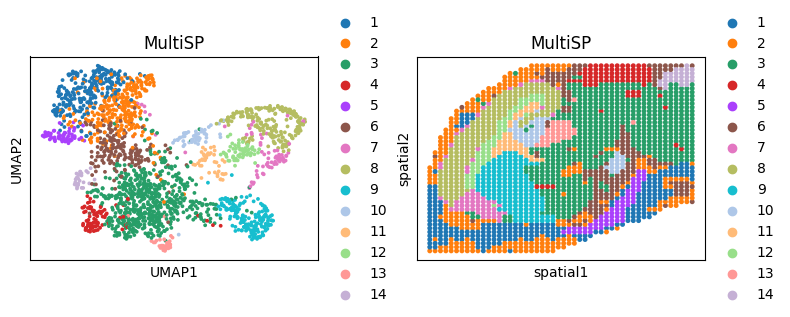

In [8]:
# visualization
import matplotlib.pyplot as plt
fig, ax_list = plt.subplots(1, 2, figsize=(8, 3))
sc.pp.neighbors(adata, use_rep='MultiSP_latent',n_neighbors=20)
sc.tl.umap(adata)

sc.pl.umap(adata, color='MultiSP', ax=ax_list[0], title='MultiSP', s=30, show=False,wspace=0.5)
sc.pl.embedding(adata, basis='spatial', color='MultiSP', ax=ax_list[1], title='MultiSP', s=50, show=False)

plt.tight_layout(w_pad=0.3)
plt.show()